In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Preprocessing

In [78]:
#link Drive into colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
#Load Data
raw_df=pd.read_csv('/content/drive/MyDrive/Lumen/iranian+churn+dataset/Customer Churn.csv')

In [80]:
raw_df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [81]:
#shape of df
raw_df.shape

(3150, 14)

In [82]:
raw_df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [83]:

#check variable data type
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [84]:
#duplicate value
print('No.of Duplicated values :',raw_df.duplicated().sum())

No.of Duplicated values : 300


In [85]:
#drop duplicated rows
raw_df.drop_duplicates(inplace=True)
print('No.of Duplicated values :',raw_df.duplicated().sum())

No.of Duplicated values : 0


In [86]:
#avoid data imBalancing
raw_df['Churn'].value_counts()


Churn
0    2404
1     446
Name: count, dtype: int64

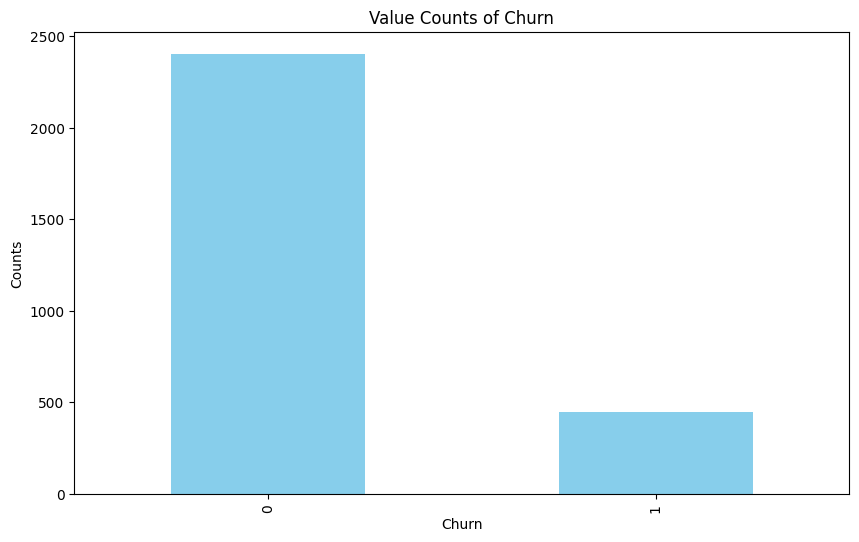

In [87]:
plt.figure(figsize=(10, 6))
raw_df['Churn'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Value Counts of Churn')
plt.xlabel('Churn')
plt.ylabel('Counts')
plt.show()

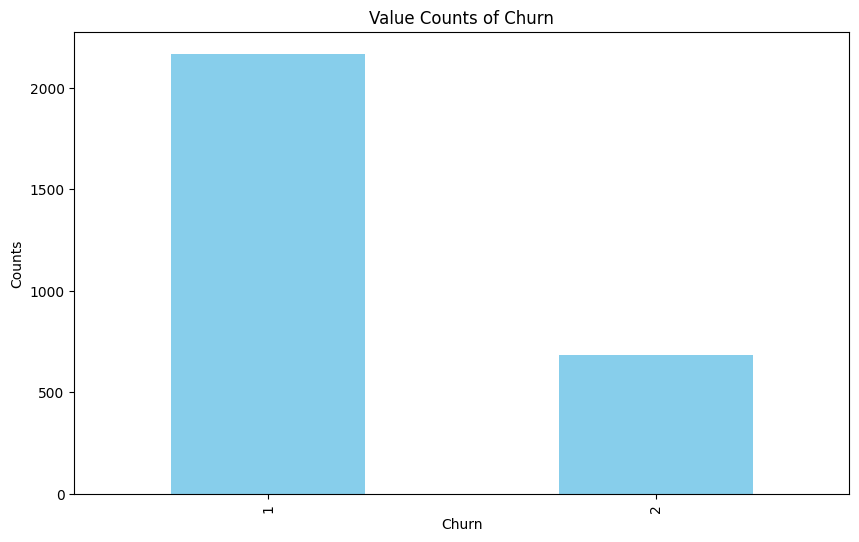

In [88]:
plt.figure(figsize=(10, 6))
raw_df['Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Value Counts of Churn')
plt.xlabel('Churn')
plt.ylabel('Counts')
plt.show()

In [89]:
#Drop Unknown data
raw_df.drop(["Age Group","Status"],axis=1,inplace=True)

In [90]:
raw_df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Tariff Plan', 'Age', 'Customer Value',
       'Churn'],
      dtype='object')

In [91]:
#Create Age group
bins = [0, 12, 18, 35, 60, 100]
labels = [0,1,2,3,4]
raw_df['age_group'] = pd.cut(raw_df['Age'], bins=bins, labels=labels, right=False)



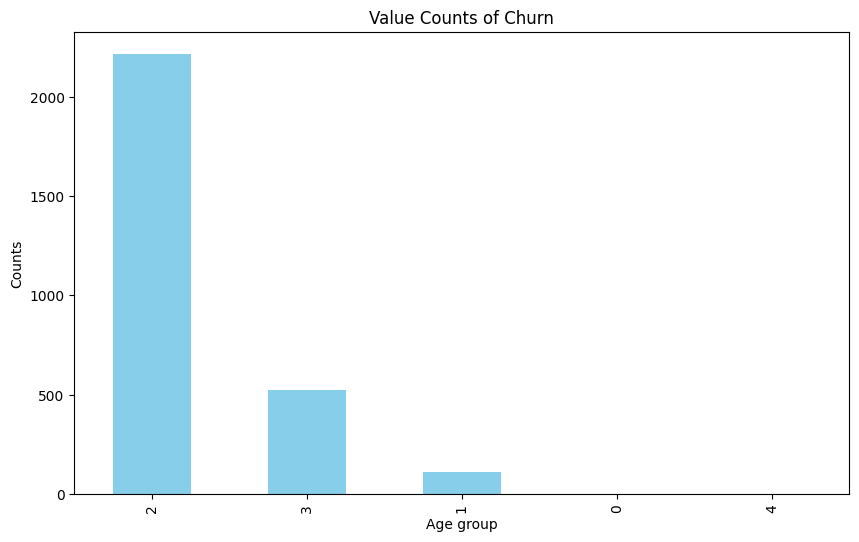

In [92]:
plt.figure(figsize=(10, 6))
raw_df['age_group'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Value Counts of Churn')
plt.xlabel('Age group')
plt.ylabel('Counts')
plt.show()

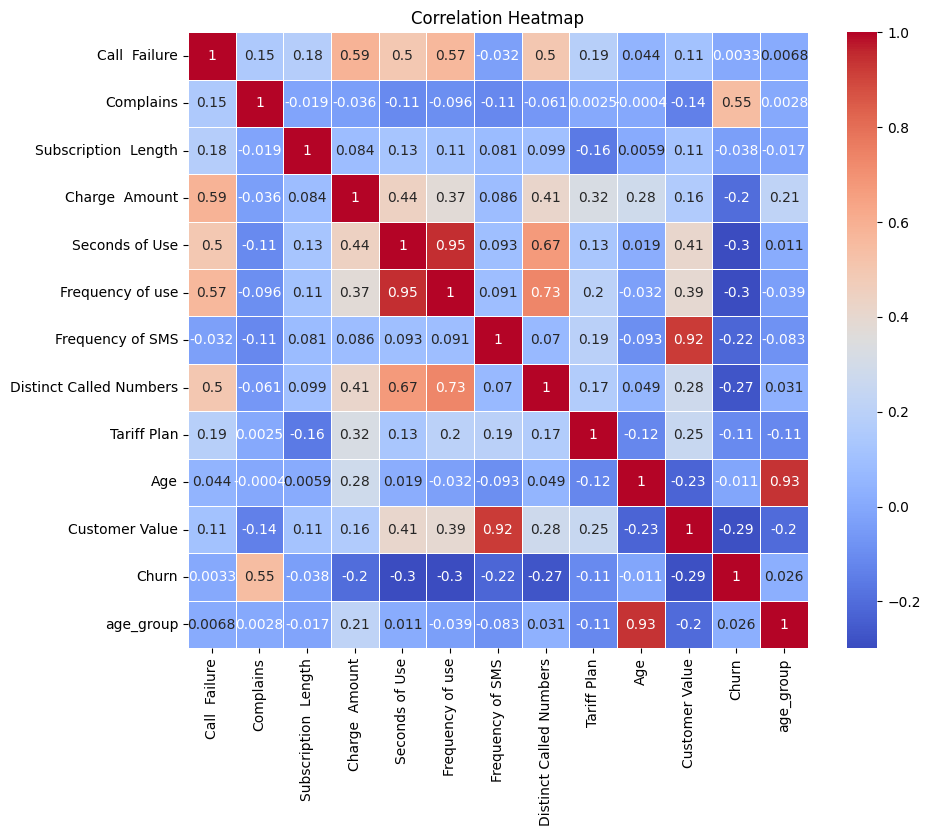

In [93]:
#checking co relattion between two variables
corr_matrix=raw_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

###  Age and age group , Seconds of use and Frequency of use is co related we use any one of then.

## Model selection and **train_test_split**

In [94]:
X=raw_df.drop(columns=['Churn'])
y=raw_df['Churn']
print(X.shape,y.shape)

(2850, 12) (2850,)


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [148]:
#Use Randomforest algorithm to classify the churn.
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=70, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=70, random_state=42)

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = rf.predict(X_test)

# Display the metrics

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")


Accuracy: 0.957
Precision: 0.886
Recall: 0.826
F1 Score: 0.855


In [150]:
rf.fit(X_train, y_train)

# Evaluate the model
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print(f'Training Accuracy: {train_score}')
print(f'Test Accuracy: {test_score}')


Training Accuracy: 0.9944862155388471
Test Accuracy: 0.9567251461988304


In [151]:
# Trying other algorithm to find best accuracy and F1 Score
from sklearn.linear_model import LogisticRegression

LR_model=LogisticRegression()

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Evaluate the model
train_score = LR_model.score(X_train, y_train)
test_score = LR_model.score(X_test, y_test)

print(f'Training Accuracy: {train_score}')
print(f'Test Accuracy: {test_score}')

Training Accuracy: 0.9112781954887218
Test Accuracy: 0.8982456140350877


## RandomForest Classifier is giving good accuracy of 95.7%

In [159]:
# save model
import pickle

with open('churn_model.pkl', 'wb') as file:
    pickle.dump(rf, file)